<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1725838570129);
        }
    })</script><title>IMDb Top 250 Movies</title><meta content="As rated by regular IMDb voters." data-id="main" name="description"/><script type="application/ld+json">{"@type":"ItemList","itemListElement":[{"@type":"ListItem","item":{"@type":"Movie","url":"https://www.imdb.com/title/t

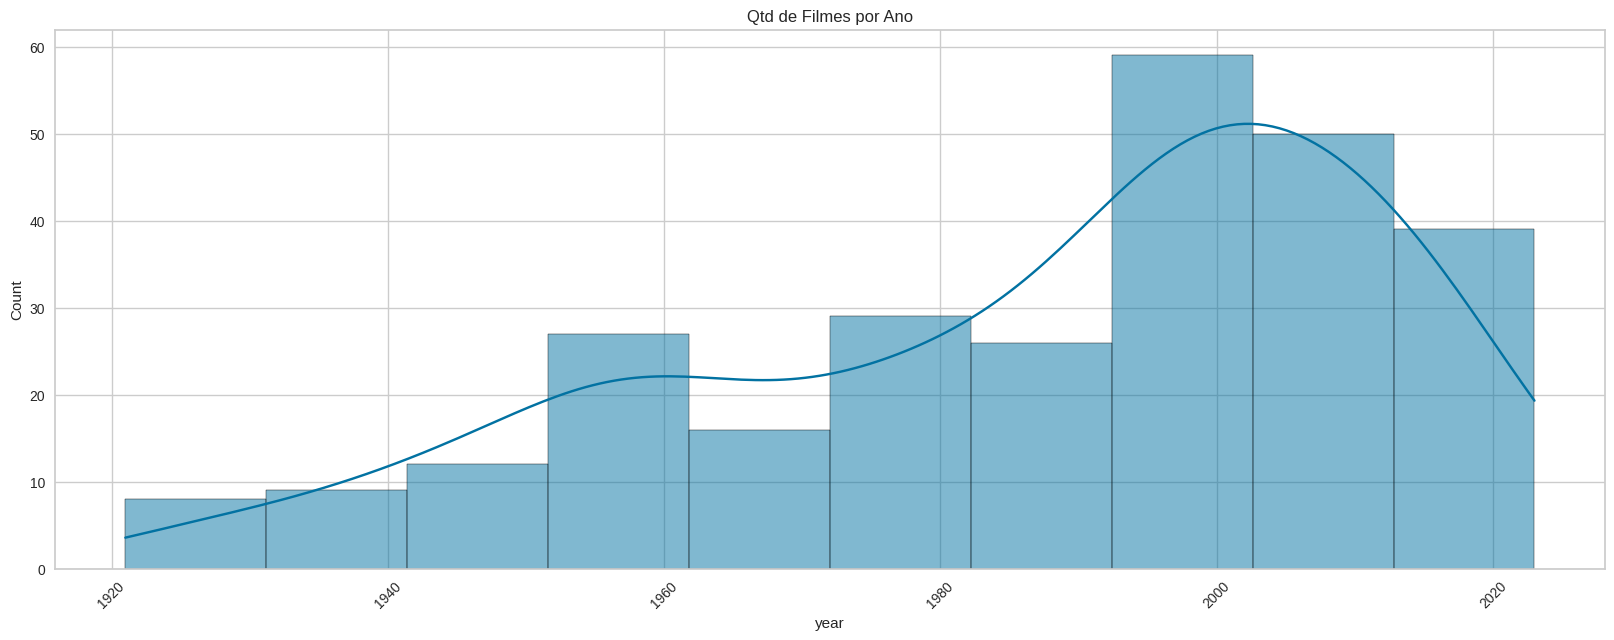

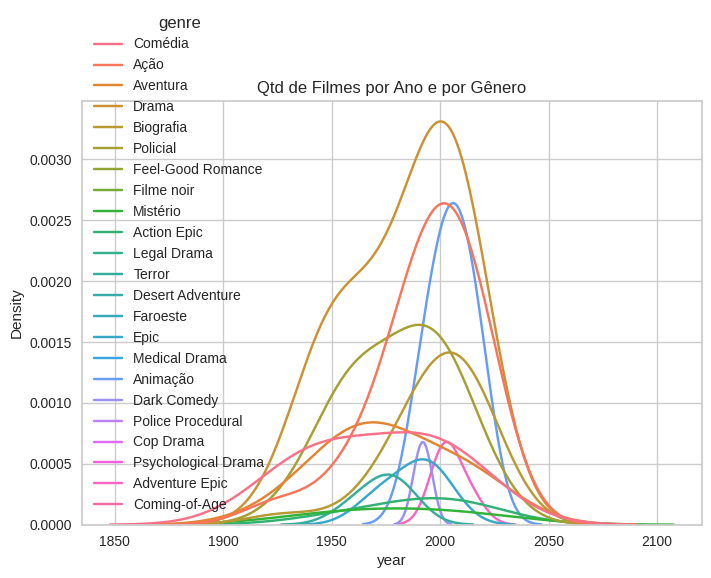

             title_pt            title_en  year  rating     genre  \
130          O Garoto        131. The Kid  1921     8.2   Comédia   
197  Bancando o Águia   198. Sherlock Jr.  1924     8.2      Ação   
182  Em Busca do Ouro  183. The Gold Rush  1925     8.1  Aventura   
190         A General    191. The General  1926     8.1      Ação   
116        Metrópolis     117. Metropolis  1927     8.3     Drama   

                                               sinopse  word_count  
130  um mendigo cuida de uma criança abandonada, ma...          13  
197  um projecionista de cinema deseja ser um detet...          31  
182  um garimpeiro vai ao klondike em busca de ouro...          15  
190  uns espiões roubam a amada locomotiva de um en...          17  
116  numa cidade futurística dividida entre os trab...          20  


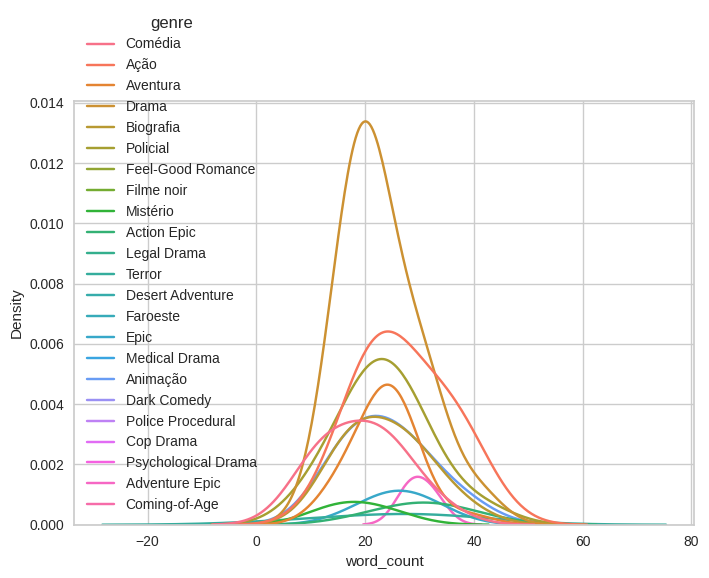

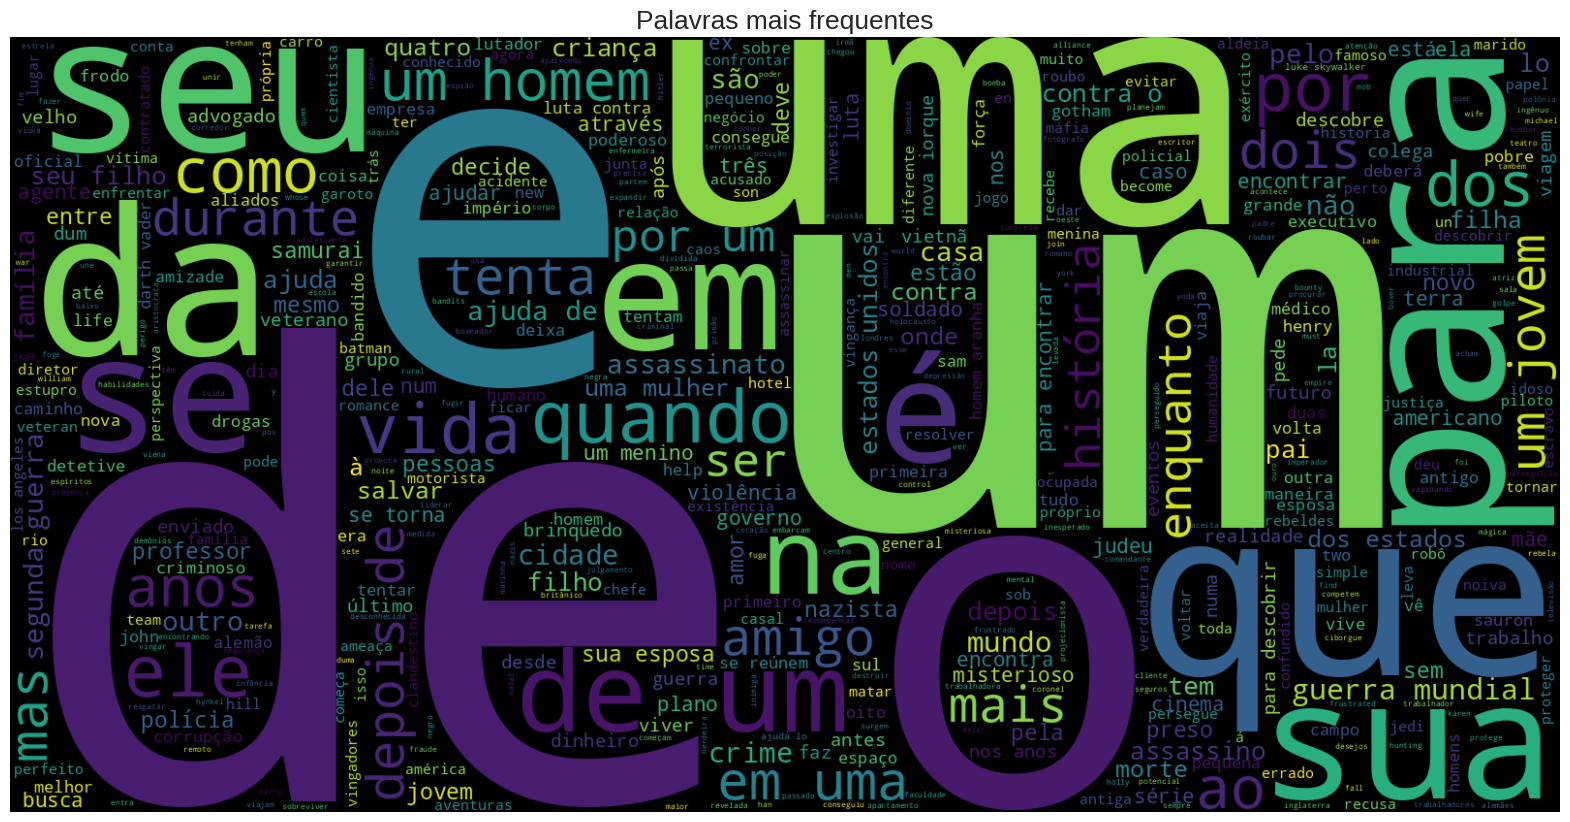

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


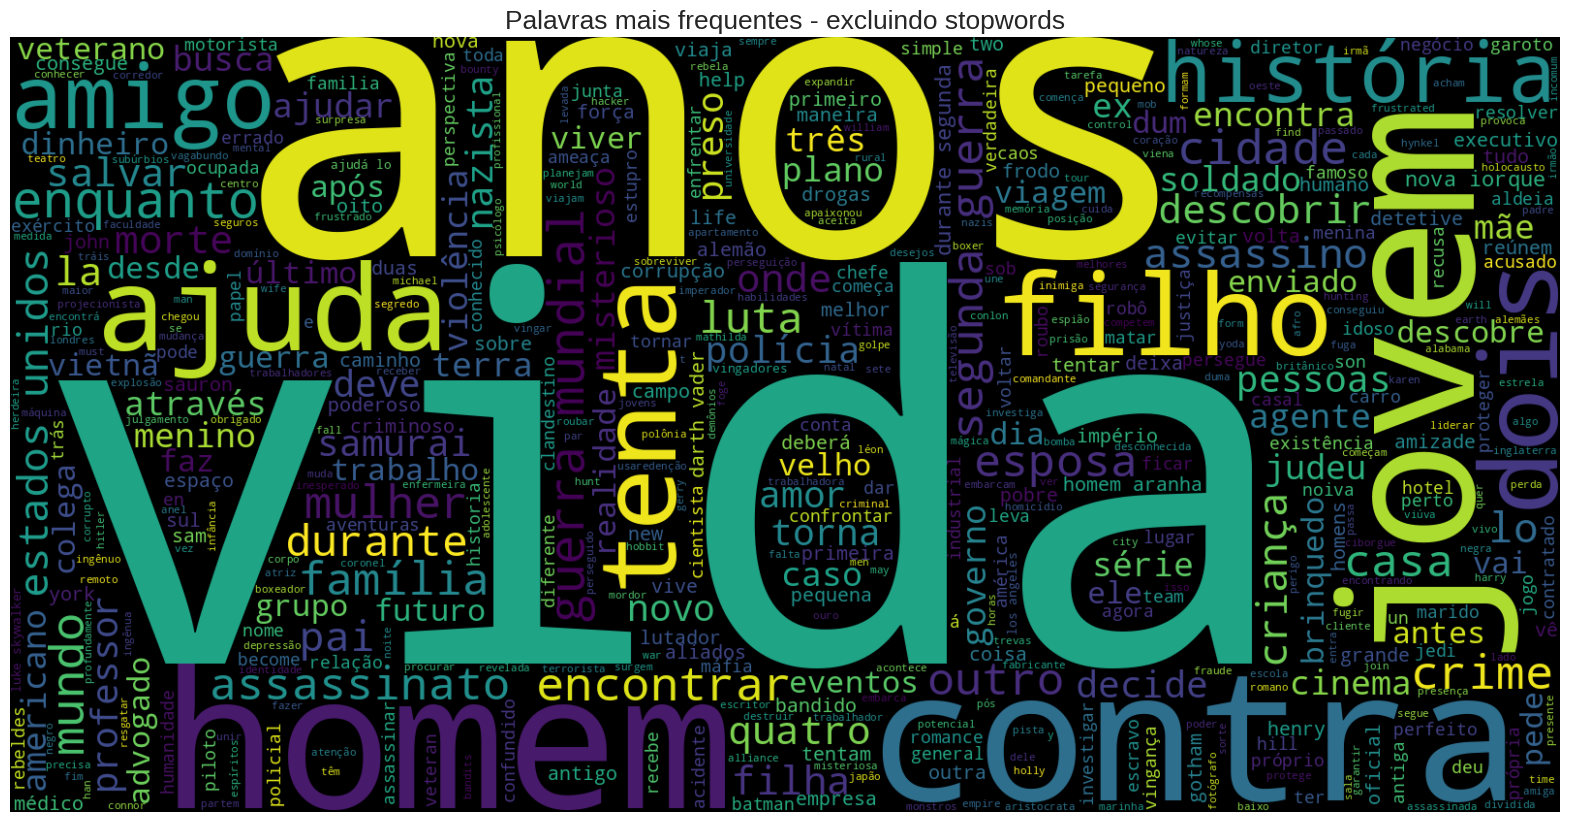

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



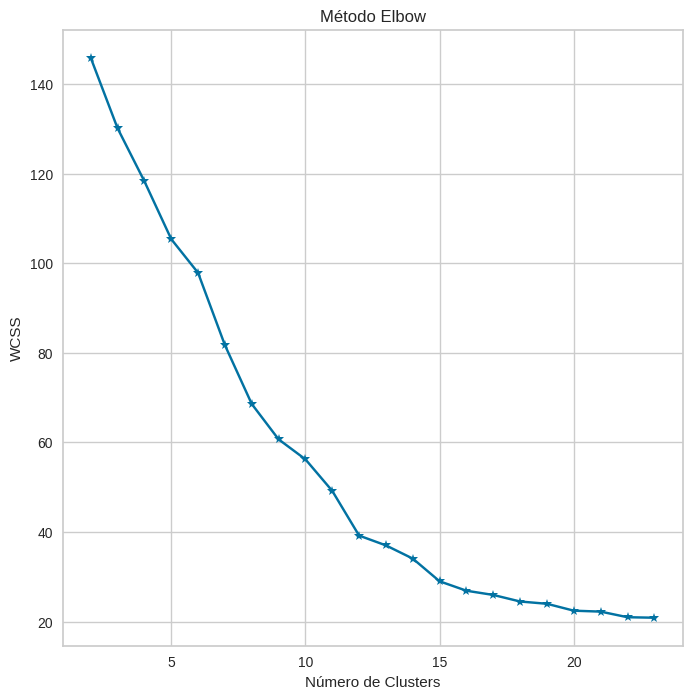

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



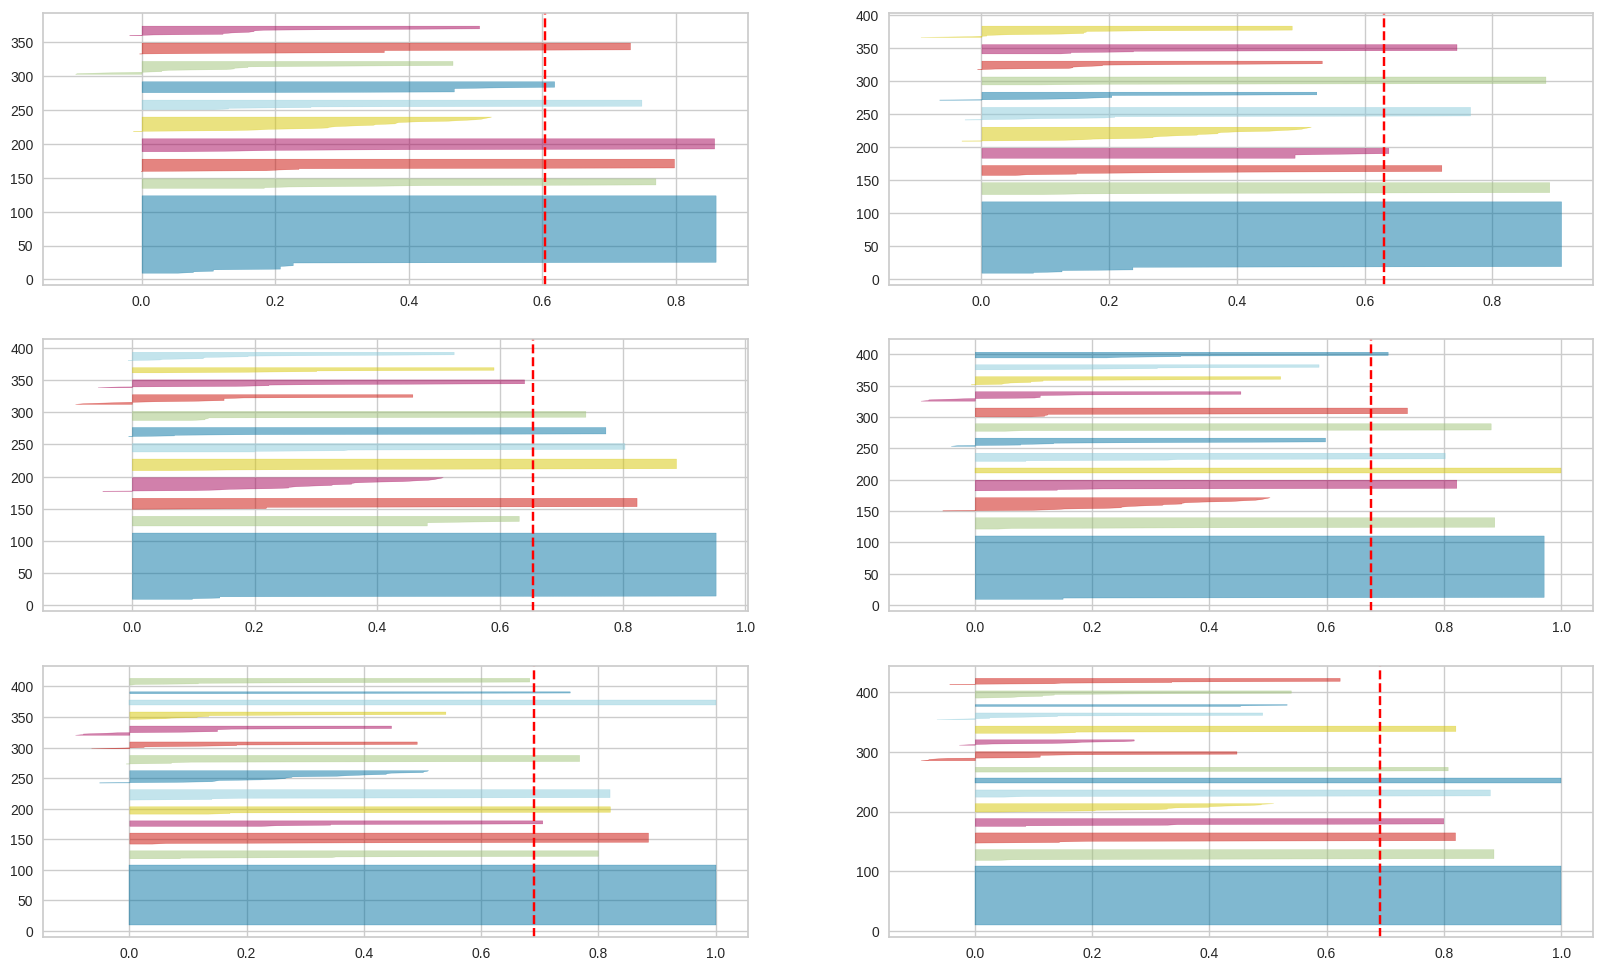

In [2]:
# Notebook 1

import pandas as pd
import numpy as np
import requests
from pprint import pprint
from bs4 import BeautifulSoup
import re
import json
from urllib.request import Request, urlopen
from lxml import html
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Step 1: Retrieve Data from IMDb
userAgents = [
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/74.0.3729.157 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.1 Safari/605.1.15"
]

url = 'https://www.imdb.com/chart/top/?ref_=nv_mv_250'
response = requests.get(url, headers={"User-agent": userAgents[1]})
html = response.text

# Step 2: Parse the HTML content
bs = BeautifulSoup(html)
print(bs)

# Extracting Titles
titles = bs.find_all('h3', attrs={'class': 'ipc-title__text'})
list_title_en = [t.text.strip().split('.')[-1] for t in titles if t.text not in ['IMDb Charts', 'Recently viewed']]
print(len(list_title_en))
print(list_title_en)

# Extracting Years
list_years = []
years = bs.find_all('div', attrs={'class': 'sc-b189961a-7 btCcOY cli-title-metadata'})
for year in years:
    list_years.append(year.text[:4])
print(len(list_years))
print(list_years)

# Extracting Ratings
list_rating = []
rating_span = bs.find_all('span', class_='ipc-rating-star--rating')
for x in rating_span:
    list_rating.append(x.text)
print(len(list_rating))
print(list_rating)

# Extracting Links
list_links = []
for a in bs.find_all('a', href=True):
    if '/title/' in a['href'] and 'https://www.imdb.com/' + a['href'] not in list_links:
        list_links.append(('https://www.imdb.com/' + a['href'])[:-15])

# Remove duplicates and unwanted links
list_links = list(dict.fromkeys(list_links))
list_links = list_links[1:]
print(len(list_links))
print(list_links[:5])

# Step 3: Retrieve additional information for each movie
headers = {
    'authority': 'www.amazon.com.br',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36',
}

list_genre = []
list_title_pt = []
list_year = []
list_sinopse = []

for link in list_links:
    time.sleep(.5)
    response = requests.get(link, headers=headers)
    soup = BeautifulSoup(response.content, "html.parser")

    # Extract Genre
    try:
        genre = soup.find('span', {'class': 'ipc-chip__text'}).text
        list_genre.append(genre)
    except:
        list_genre.append(np.nan)
        print('Nan')

    # Extract Title_PT and Year
    try:
        title_pt = (soup.find('title').text)[:-14].strip()
        year = (soup.find('title').text)[-12:-8].strip()
        list_title_pt.append(title_pt)
        list_year.append(year)
    except:
        list_title_pt.append(np.nan)
        list_year.append(np.nan)

    # Extract Synopsis
    try:
        sinopse = soup.find('span', {"data-testid": "plot-xl"}).text
        list_sinopse.append(sinopse)
    except:
        list_sinopse.append(np.nan)

    print(genre, title_pt, year, sinopse[:20])

print(len(list_genre), len(list_title_pt), len(list_year), len(list_sinopse))
print(list_genre[:5])
print(list_title_pt[:5])
print(list_year[:5])
print(list_sinopse[:2])

# Step 4: Create a DataFrame
df = pd.DataFrame({
    'title_pt': list_title_pt,
    'title_en': list_title_en,
    'year': list_years,
    'rating': list_rating,
    'genre': list_genre,
    'sinopse': list_sinopse
})
print(df.head())

# Step 5: Data Cleaning and Integration
from google.colab import drive
drive.mount('/content/drive')

df_historico = pd.read_csv('/content/all_movies.csv', sep=';')
df = pd.concat([df_historico, df])
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

# Convert 'year' column to numeric type and sort by year
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df.sort_values('year', inplace=True)
df.head()

df.info()

# Adjust variable types
df['year'] = df['year'].astype('int64')
df['rating'] = df['rating'].astype('float64')

df.describe()

# Step 6: Visualizations
fig = px.bar(df.genre.value_counts('d')*100,
             text_auto=True,
             title='% de Filmes por Gênero',
             labels={'index': 'Gênero', 'value': '% de Filmes'})
fig.show()

plt.figure(figsize=(20, 7))
sns.histplot(df, x='year', kde=True).set_title('Qtd de Filmes por Ano')
plt.xticks(rotation=45)
plt.show()

sns.kdeplot(df, x='year', hue='genre', bw_adjust=1.5, warn_singular=False).set_title('Qtd de Filmes por Ano e por Gênero')
plt.show()

# Step 7: Preprocessing for Clustering
df_processed = df.copy()
df_processed['sinopse'] = df_processed['sinopse'].str.lower()

def qty_words(text):
    return len(text.split())

df_processed['word_count'] = df_processed['sinopse'].apply(qty_words).astype('int64')
print(df_processed.head())

sns.kdeplot(df_processed, x='word_count', hue='genre', bw_adjust=1.5, warn_singular=False)
plt.show()

# Step 8: WordCloud Visualization
text = ' '.join(df_processed['sinopse'])
plt.figure(figsize=(20, 15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras mais frequentes', fontsize=19)
plt.show()

# Remove stopwords and create another WordCloud
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

df_processed['sinopse_no_stopwords'] = df_processed['sinopse'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
text_no_stopwords = ' '.join(df_processed['sinopse_no_stopwords'])
plt.figure(figsize=(20, 15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text_no_stopwords)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras mais frequentes - excluindo stopwords', fontsize=19)
plt.show()

# Step 9: Clustering
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=0.05, max_df=0.95, ngram_range=(1, 2))
X = vectorizer.fit_transform(df_processed['sinopse_no_stopwords'])

plt.figure(figsize=(8, 8))
wcss = []
for i in range(2, df_processed.genre.nunique() + 1):
    kmeans = KMeans(n_clusters=i, init='random')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, df_processed.genre.nunique() + 1), wcss, '*-')
plt.title('Método Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

# Step 10: Silhouette Visualization
fig, ax = plt.subplots(3, 2, figsize=(20, 12))
for i in range(6):
    kmeans = KMeans(n_clusters=i + 10, init='k-means++', n_init=10, max_iter=100, random_state=42)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[i // 2][i % 2])
    visualizer.fit(X)

# Step 11: Final Clustering with K=5
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)
df_processed['kmeans_labels'] = labels

# Step 12: Save the processed DataFrame
df_processed.to_csv('/content/drive/MyDrive/df_movies_kmeans.csv', index=False, sep=';')
